### Table of content
- <a href="#Clinical-trials-by-country-distribution">Clinical trials by country distribution (pie chart)</a>
- <a href="#Clinical-trials-by-country-(Sep-2018)">Clinical trials by country distribution (world map)</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [2]:
countries_full_df = pd.read_csv(
    r"c:\Dev\04. Python\03. XML converter of FDA list\goodDB\04. 2018Sep17_13-28-24\FDA_DB_COUNTRY_LOC_TABLE_2018Sep17_13-28-24.csv")

In [3]:
#Data cleaning
countries_full_df['country'][countries_full_df['country'] == "United States"] = "United States of America"
countries_full_df['country'][countries_full_df['country'] == "Congo, The Democratic Republic of the"] = "Congo"
countries_full_df['country'][countries_full_df['country'] == "Czech Republic"] = "Czechia"

In [4]:
#This is to look for countries which may not be present in the dataset
# westernSakhara_DF = pd.DataFrame(countries_full_df[countries_full_df["country"].str.lower().str.contains("stan")])
# westernSakhara_DF.groupby("country").count()

In [5]:
counted_countries = countries_full_df.groupby('country').count()

In [6]:
%run -i create_uniform_buckets.py 
bucketsArray = createUniformBucketsFromSeries(pd.Series(counted_countries.nct_id), numberOfBuckets=8)

Max value:114420
Min value:1
Series Length = 203
Ideal bucket len:25
Bucket value counts:[27, 25, 24, 25, 24, 24, 24, 24, 6]


In [7]:
sorted_counted_countries = pd.DataFrame(counted_countries.sort_values(by="nct_id", ascending=False))
#Have to make index correct - so it is not resolved to United States Minor Outlying Islands
#In dataset it is just "United States"
#http://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
first_index = sorted_counted_countries.index[0]
print(first_index)
sorted_counted_countries.rename(index={first_index:"United States of America"}, inplace=True)

maxCountryCount = sorted_counted_countries.nct_id.max()
print("max:"+str(maxCountryCount))
minCountryCount = sorted_counted_countries.nct_id.min()
print("min:"+str(minCountryCount))
print(str(len(sorted_counted_countries.groupby("nct_id"))))
# sorted_counted_countries.head()

United States of America
max:114420
min:1
144


# Clinical trials by country distribution
<a href="#Content">Table of content</a>

In [8]:
FILTER_THRESHOLD = 10000

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

COUNTRY_LABEL_FONT_SIZE = 8

def updateGraphBasedOnThreshold(threshold):
    print("Threshold:{}".format(threshold))
    
    FILTER_THRESHOLD = threshold
    
    sum_of_all_countries = sorted_counted_countries.nct_id.sum()
    print("Sum of all countries:{}".format(sum_of_all_countries))

    sum_of_none = sorted_counted_countries.loc["**None**", "nct_id"]
    print("Sum of none:{}".format(sum_of_none))
    sum_of_all_countries_below_threshold = sorted_counted_countries[sorted_counted_countries.nct_id<FILTER_THRESHOLD].nct_id.sum()
    print("sum_of_all_countries_below_threshold:{}".format(sum_of_all_countries_below_threshold))

    other_name = "Other(<"+str(FILTER_THRESHOLD)+" studies per country)"
    countryListWithNone = pd.DataFrame(sorted_counted_countries[sorted_counted_countries.nct_id>=FILTER_THRESHOLD])
    countryListWithNone.loc[other_name] = sum_of_all_countries - countryListWithNone.nct_id.sum()

    countryListWithoutNone = pd.DataFrame(countryListWithNone[countryListWithNone.index != "**None**"])

    countryListWithoutNoneWithouOther = pd.DataFrame(countryListWithoutNone[countryListWithoutNone.index != other_name])
    
    
    #PLOTTING
    
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle("Clinical trials by country distribution", fontsize=16)
    plt.subplot(221)
    patches, texts, autotexts = plt.pie(countryListWithNone.nct_id, 
            explode = list(np.zeros(len(countryListWithNone))+0.1), 
            labels=countryListWithNone.index, 
            autopct='%1.1f%%',
            shadow=False, startangle=90)
     
    for txt in texts:
        txt.set_fontsize(COUNTRY_LABEL_FONT_SIZE)
    plt.title("incl. studies with no country specified")
    plt.axis('equal')


    plt.subplot(222)
    plt.title("excl. studies with no country specified")
    patches, texts, autotexts = plt.pie(countryListWithoutNone.nct_id, 
            explode = list(np.zeros(len(countryListWithoutNone))+0.1), 
            labels=countryListWithoutNone.index, 
            autopct='%1.1f%%',
            shadow=False, startangle=90)
    for txt in texts:
        txt.set_fontsize(COUNTRY_LABEL_FONT_SIZE)
    plt.axis('equal')


    plt.subplot(223)
    patches, texts, autotexts = plt.pie(countryListWithoutNoneWithouOther.nct_id, 
            explode = list(np.zeros(len(countryListWithoutNoneWithouOther))+0.1), 
            labels=countryListWithoutNoneWithouOther.index, 
            autopct='%1.1f%%',
            shadow=False, startangle=90)
    for txt in texts:
        txt.set_fontsize(COUNTRY_LABEL_FONT_SIZE)
    plt.axis('equal')
    plt.title("countries above threshold \n({}, excluding 'no country')".format(FILTER_THRESHOLD))
    
    plt.show()
    
    fig.savefig("pieCharts.png")
    
    return None

interact(updateGraphBasedOnThreshold, threshold=widgets.IntSlider(min=0,max=60000,step=1000,value=20000));
# updateGraphBasedOnThreshold(10000)

interactive(children=(IntSlider(value=20000, description='threshold', max=60000, step=1000), Output()), _dom_c…

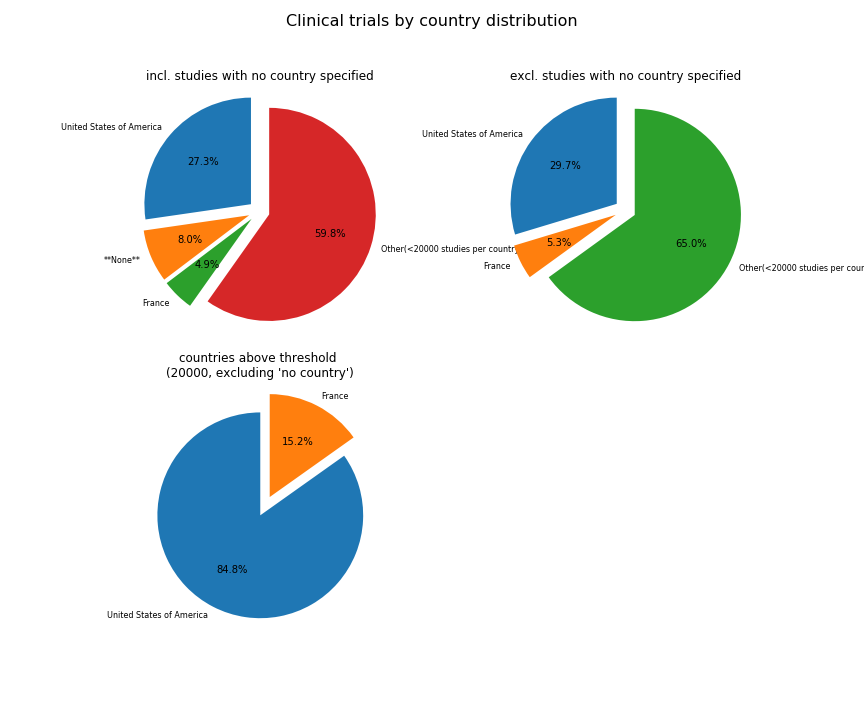

In [9]:
from IPython.display import Image
Image("pieCharts.png")

In [10]:
%run country_codes_conversion.py 
for row in sorted_counted_countries.index:
    iso2digitCode = get2ISOcodeFromCountryName(row)
    sorted_counted_countries.loc[row, "iso2"] = str(iso2digitCode)
pass

<Figure size 432x288 with 0 Axes>

In [11]:
sorted_counted_countries.loc[sorted_counted_countries.iso2=='CZ']

,nct_id,iso2
country,,


In [12]:
iso2_check_for_duplicates = pd.DataFrame(sorted_counted_countries.groupby(by="iso2").count()).sort_values(by="nct_id", ascending=False)
#All should be 1s (no 2s - those are duplicates)
iso2_check_for_duplicates.head()

,nct_id
iso2,
ad,1
no_code_former serbia and montenegro,1
my,1
mz,1
na,1


In [23]:
exportDF = pd.DataFrame(sorted_counted_countries)
#CLEANING BEFORE EXPORTING TO JSON
exportDF["full_country_name"] = exportDF.index
exportDF.rename(columns={"nct_id":"nct_id_count"}, inplace=True)
exportDF.head()

,nct_id_count,iso2,full_country_name
country,,,
United States of America,114420,us,United States of America
**None**,33652,no_code_**none**,**None**
France,20464,fr,France
Canada,18965,ca,Canada
Germany,17464,de,Germany


In [28]:
exportDF2 = pd.DataFrame(exportDF).set_index("iso2")
# exportDF.to_csv(r"c:\Dev\05. Jupyter\2. FDA countries clean\csv\countries_trials_28Oct.csv")

# exportDF2.
exportDF2.to_json(r"c:\Dev\05. Jupyter\2. FDA countries clean\csv\countries_trials_28Oct.json", 
                 orient="index",
                 
                )
#json beautifier: https://codebeautify.org/jsonviewer
exportDF2.head()

,nct_id_count,full_country_name
iso2,,
us,114420,United States of America
no_code_**none**,33652,**None**
fr,20464,France
ca,18965,Canada
de,17464,Germany


In [17]:
#https://stackoverflow.com/questions/32714783/ipython-run-all-cells-below-from-a-widget
from IPython.display import Javascript, display
def run_cells_below():
    display(Javascript('IPython.notebook.execute_cells_below()'))

In [15]:
%run -i transformSVG.py 

svgConverted = transformCountrySVG(exportDF, bucketsArray,  \
                                  [ "#d73027", "#f46d43", "#fdae61", "#fee090", "#ffffbf", "#e0f3f8", \
                                    "#abd9e9", "#74add1", "#4575b4"]  \
                )
run_cells_below()

FileNotFoundError: [Errno 2] No such file or directory: 'world-map_20Sep2018.svg'

# Clinical trials by country (Sep 2018)
<a href="#Content">Table of content</a>

In [ ]:
from IPython.core.display import display, HTML, DisplayObject
from IPython.display import SVG
SVG(svgConverted)